In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ohw_anonymised.csv', index_col='datetime', parse_dates=True)
df_ohw20 = df[df.ohw20_repo]
df

,author,message,ohw20_repo
datetime,,,
2020-08-20 15:08:09+00:00,participant-20,Merge pull request #1 from cbirdferrer/patch-1...,False
2020-08-17 16:24:17+00:00,participant-20,deleting old presentation_figs file,True
2020-08-14 20:00:38+00:00,participant-20,adding improvements to interpolate notebook to...,True
2020-08-14 20:00:38+00:00,participant-20,merging changes,True
2020-08-14 20:00:38+00:00,participant-20,merging interpolate notebook,True
...,...,...,...
2020-08-07 15:58:21+00:00,participant-32,change read.md,False
2020-08-06 22:26:24+00:00,participant-32,change new2.md and create new.md,False
2020-08-06 22:25:02+00:00,participant-32,changes in new.md and new2.md,False


### Commits in time

(array([118., 187.,  75., 112., 103., 119., 183., 161., 372., 106.]),
 array([18408.07040509, 18417.25943403, 18426.44846296, 18435.6374919 ,
        18444.82652083, 18454.01554977, 18463.2045787 , 18472.39360764,
        18481.58263657, 18490.77166551, 18499.96069444]),
 <BarContainer object of 10 artists>)

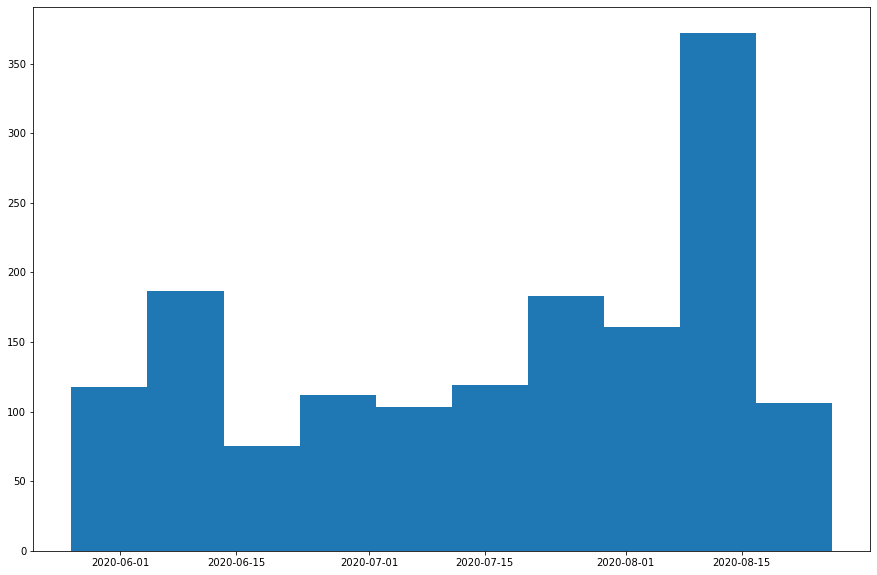

In [3]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(df.index)

What about hackweek only?

(array([15., 21., 68., 93.,  5.,  0.,  0.,  1.,  2.,  6.]),
 array([18486.50423611, 18487.14395833, 18487.78368056, 18488.42340278,
        18489.063125  , 18489.70284722, 18490.34256944, 18490.98229167,
        18491.62201389, 18492.26173611, 18492.90145833]),
 <BarContainer object of 10 artists>)

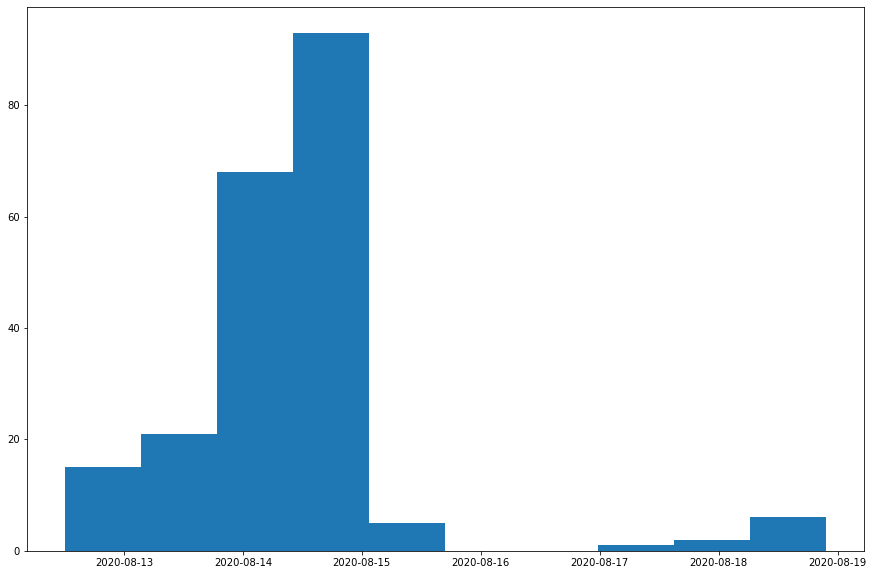

In [4]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(df_ohw20.index)

What is the distribution of commits amongst participants like?

In [7]:
from collections import Counter
c = Counter(df_ohw20.author)
MVP = c.most_common()
mvp_names, mvp_nums = [], []
for tup in MVP:
    mvp_names.append(tup[0])
    mvp_nums.append(tup[1])

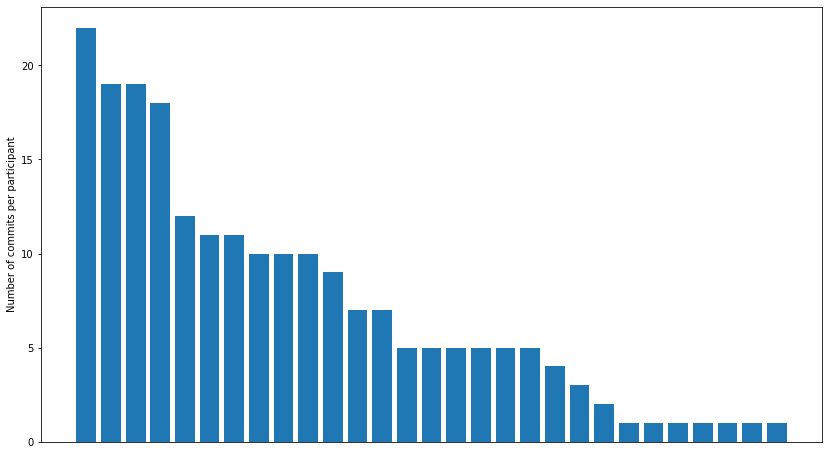

In [8]:
fig, ax = plt.subplots(figsize=(14,8))
ax.bar(mvp_names, mvp_nums)
ax.set(xticks=[], ylabel='Number of commits per participant');